Make sure you are using python 3

In [1]:
# check python version
from platform import python_version
print(python_version())

Got the New York arrest data from here:

https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2018/index.html

In [2]:
# download data
URL = 'https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2018/all.xls'
filename = 'all.xls'
from urllib.request import urlretrieve
urlretrieve(URL,filename)

('all.xls', <http.client.HTTPMessage at 0x10e437590>)

In [3]:
# make sure the downloaded file is ignored so it's not in the github folder

This dataset has the county data in different sheets. For example, this is data from the Franklin county tab.

In [4]:
import pandas as pd
# import data from the Franklin sheet. only include parts of the spreadsheet that includes data
# we are inetrested in
Franklin = pd.read_excel('all.xls', sheet_name = "Albany", skiprows = 15,nrows =2, usecols = "C,E:J")
Franklin

,Unnamed: 2,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown
0,Total Arrests,7132,3242,3035,630,75,150
1,Felony Total,2555,928,1302,254,19,52


In [5]:
# do this for all counties

In [6]:
# List of sheet names
xl = pd.ExcelFile('all.xls')

sheetnames = xl.sheet_names  # see all sheet names

sheetnames[1:5]

['NewYorkState', 'NYC', 'Non-NYC', 'Albany']

In [7]:
# check the length 
len(sheetnames)

66

In [8]:
# only get the county names. ignore first three rows
counties = sheetnames[4:66]

In [9]:
# makes sure we only have data from 62 counties
len(counties)

62

In [10]:
# create empty data frame
column_names = ["Total Arrests","White","Black","Hispanic","Asian","Other-Unknown"]
df = pd.DataFrame(columns = column_names)

In [11]:
# run a loop to extract data from each sheet
data = []
for c in counties:
    sheetname = c
    countydata = pd.read_excel('all.xls', sheet_name = sheetname, skiprows = 15,nrows =1, usecols = "C,E:J")
    county = [[]] * 1
    county[0].append(sheetname)
    countydata['County'] = county
    data.append(countydata)

In [12]:
df = df.append(data, True)

In [13]:
df.head()

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County
0,7132,3242,3035,630,75,150,Total Arrests,[Albany]
1,830,755,55,12,3,5,Total Arrests,[Allegany]
2,47413,1781,21437,23196,618,381,Total Arrests,[Bronx]
3,5091,3396,1236,363,45,51,Total Arrests,[Broome]
4,1697,1318,150,36,10,183,Total Arrests,[Cattaraugus]


Now, get county population data from here: 
https://data.ny.gov/Government-Finance/Annual-Population-Estimates-for-New-York-State-and/krt9-ym2k

In [14]:
# get population by county
url2 = 'https://data.ny.gov/api/views/krt9-ym2k/rows.csv?accessType=DOWNLOAD&bom=true&format=true&sorting=true'
filename2 = 'population.csv'
from urllib.request import urlretrieve
urlretrieve(url2,filename2)  

('population.csv', <http.client.HTTPMessage at 0x11f34b250>)

In [15]:
import pandas as pd

population = pd.read_csv('population.csv')
# examine data. It seems like this has data for a lot of years
population.shape

(3465, 5)

In [16]:

population.head()

,FIPS Code,Geography,Year,Program Type,Population
0,36000,New York State,2019,Postcensal Population Estimate,"19,453,561"
1,36001,Albany County,2019,Postcensal Population Estimate,"305,506"
2,36003,Allegany County,2019,Postcensal Population Estimate,"46,091"
3,36005,Bronx County,2019,Postcensal Population Estimate,"1,418,207"
4,36007,Broome County,2019,Postcensal Population Estimate,"190,488"


In [17]:
# Extract population data from 2018
population18 = population[population.Year == 2018]
len(population18)

63

In [18]:
# exclude the total population
population_c = population18[1:63]

In [19]:
len(population_c)

62

In [20]:
population_c.head()

,FIPS Code,Geography,Year,Program Type,Population
64,36001,Albany County,2018,Postcensal Population Estimate,"306,585"
65,36003,Allegany County,2018,Postcensal Population Estimate,"46,332"
66,36005,Bronx County,2018,Postcensal Population Estimate,"1,432,087"
67,36007,Broome County,2018,Postcensal Population Estimate,"191,925"
68,36009,Cattaraugus County,2018,Postcensal Population Estimate,"76,726"


In [21]:
# extract just the poulation
population_ce = population_c["Population"]
population_ce.reset_index(drop=True,inplace=True) 
# included drop and inplace option to get rid of 
# original index

In [22]:
# combine the population with the original table
df2 = pd.concat([df,population_ce], axis=1)
df2

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County,Population
0,7132,3242,3035,630,75,150,Total Arrests,[Albany],"306,585"
1,830,755,55,12,3,5,Total Arrests,[Allegany],"46,332"
2,47413,1781,21437,23196,618,381,Total Arrests,[Bronx],"1,432,087"
3,5091,3396,1236,363,45,51,Total Arrests,[Broome],"191,925"
4,1697,1318,150,36,10,183,Total Arrests,[Cattaraugus],"76,726"
...,...,...,...,...,...,...,...,...,...
57,1288,1145,87,45,2,9,Total Arrests,[Washington],"61,274"
58,1527,1167,268,77,1,14,Total Arrests,[Wayne],"90,200"
59,13265,3096,5618,4164,112,275,Total Arrests,[Westchester],"968,213"
60,821,671,112,29,3,6,Total Arrests,[Wyoming],"40,023"


In [23]:
# Calculate the percentage of arrest for each race
df2['%blackarrest'] = df2['Black']/df2['Total Arrests']*100
df2['%whitearrest'] = df2['White']/df2['Total Arrests']*100
df2['%hisparrest'] = df2['Hispanic']/df2['Total Arrests']*100
df2['%asianarrest'] = df2['Asian']/df2['Total Arrests']*100
df2.head()

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County,Population,%blackarrest,%whitearrest,%hisparrest,%asianarrest
0,7132,3242,3035,630,75,150,Total Arrests,[Albany],"306,585",42.5547,45.4571,8.83343,1.0516
1,830,755,55,12,3,5,Total Arrests,[Allegany],"46,332",6.62651,90.9639,1.44578,0.361446
2,47413,1781,21437,23196,618,381,Total Arrests,[Bronx],"1,432,087",45.2133,3.75635,48.9233,1.30344
3,5091,3396,1236,363,45,51,Total Arrests,[Broome],"191,925",24.2781,66.706,7.13023,0.883913
4,1697,1318,150,36,10,183,Total Arrests,[Cattaraugus],"76,726",8.83913,77.6665,2.12139,0.589275


Race demographic data was obtained from here:

https://labor.ny.gov/stats/nys/statewide-population-data.shtm

In [24]:
# get race percentage from the 2010 cencus data 
# Assuming it's similar in 2018
# using "requests" because urllib didn't work

import requests
url3 = 'https://labor.ny.gov/stats/nys/PopCompare-Race-Ethnicity-2000-2010.xls'


r = requests.get(url3)
output = open('demographic.xls', 'wb')
output.write(r.content)
output.close() 


In [25]:
demographic = pd.read_excel('demographic.xls',skiprows = 4, usecols = "A,J:M")
demographic.head()

,Area,% White*.1,% Black* .1,% Asian* .1,% Hispanic
0,New York State,0.583000,0.144000,0.073000,0.176000
1,Downstate (10 county),0.444668,0.183366,0.101227,0.246201
2,Upstate (52 county),0.828062,0.073597,0.021994,0.053038
3,Capital,0.844021,0.065007,0.026737,0.039473
4,Albany,0.759859,0.119643,0.047665,0.049036


## Cleaning up race demographic data

In [26]:
# extract
chunk1 = demographic.iloc[4:12]


chunk1.reset_index(drop=True,inplace=True) 
# included drop and inplace option to get rid of 
# original index
chunk1.columns = ['Area','%White','%Black','%Asian','%Hispanic']

chunk1

,Area,%White,%Black,%Asian,%Hispanic
0,Albany,0.759859,0.119643,0.047665,0.049036
1,Columbia,0.882338,0.042649,0.015817,0.038893
2,Greene,0.870706,0.052945,0.007761,0.049146
3,Rensselaer,0.856525,0.060165,0.021759,0.038136
4,Saratoga,0.927325,0.013902,0.017668,0.024038
5,Schenectady,0.771740,0.087431,0.031779,0.057049
6,Warren,0.952486,0.008462,0.006833,0.017928
7,Washington,0.933245,0.027430,0.004113,0.022874


In [27]:
# extract
chunk2 = demographic.iloc[13:18]


chunk2.reset_index(drop=True,inplace=True) 
# included drop and inplace option to get rid of 
# original index
chunk2.columns = ['Area','%White','%Black','%Asian','%Hispanic']

chunk2

,Area,%White,%Black,%Asian,%Hispanic
0,Cayuga,0.913428,0.037600,0.004836,0.023692
1,Cortland,0.937490,0.014290,0.008351,0.022174
2,Madison,0.938373,0.017156,0.007843,0.017919
3,Onondaga,0.792333,0.104268,0.030769,0.040317
4,Oswego,0.950716,0.007059,0.005806,0.020899


In [28]:
# extract
chunk3 = demographic.iloc[19:28]


chunk3.reset_index(drop=True,inplace=True) 
# included drop and inplace option to get rid of 
# original index
chunk3.columns = ['Area','%White','%Black','%Asian','%Hispanic']

chunk3

,Area,%White,%Black,%Asian,%Hispanic
0,Genesee,0.915295,0.024817,0.005909,0.026898
1,Livingston,0.922056,0.022801,0.011928,0.027556
2,Monroe,0.728204,0.144353,0.032274,0.072554
3,Ontario,0.918355,0.020624,0.010294,0.034087
4,Orleans,0.878157,0.055220,0.004034,0.040972
5,Seneca,0.907747,0.042921,0.006752,0.027006
6,Wayne,0.909845,0.029252,0.004959,0.037069
7,Wyoming,0.902432,0.052971,0.003701,0.029510
8,Yates,0.961457,0.007732,0.003787,0.016609


In [29]:
# extract
chunk4 = demographic.iloc[30:28]


chunk4.reset_index(drop=True,inplace=True) 
# included drop and inplace option to get rid of 
# original index
chunk4.columns = ['Area','%White','%Black','%Asian','%Hispanic']

chunk4

,Area,%White,%Black,%Asian,%Hispanic


In [30]:
chunk4 = demographic.iloc[29:36]
chunk4.reset_index(drop=True,inplace=True) 
chunk4.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk4

,Area,%White,%Black,%Asian,%Hispanic
0,Dutchess,0.745617,0.092088,0.034724,0.105103
1,Orange,0.682001,0.090917,0.023296,0.180211
2,Putnam,0.829496,0.020530,0.018373,0.116949
3,Rockland,0.653444,0.111083,0.061276,0.156513
4,Sullivan,0.745097,0.081873,0.013321,0.136098
5,Ulster,0.817012,0.054698,0.016768,0.087176
6,Westchester,0.573760,0.133372,0.053864,0.218132


In [31]:
chunk5 = demographic.iloc[37:39]
chunk5.reset_index(drop=True,inplace=True) 
chunk5.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk5

,Area,%White,%Black,%Asian,%Hispanic
0,Nassau,0.654937,0.105488,0.075816,0.145838
1,Suffolk,0.715658,0.068381,0.033679,0.164890


In [32]:
chunk6 = demographic.iloc[40:46]
chunk6.reset_index(drop=True,inplace=True) 
chunk6.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk6

,Area,%White,%Black,%Asian,%Hispanic
0,Fulton,0.938395,0.017666,0.005763,0.022744
1,Herkimer,0.956152,0.009920,0.005037,0.016119
2,Montgomery,0.850913,0.014178,0.007089,0.112587
3,Oneida,0.848330,0.058252,0.027768,0.046062
4,Otsego,0.927320,0.015387,0.010601,0.030855
5,Schoharie,0.938716,0.012031,0.006626,0.028215


In [33]:
chunk7 = demographic.iloc[47:52]
chunk7.reset_index(drop=True,inplace=True) 
chunk7.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk7

,Area,%White,%Black,%Asian,%Hispanic
0,Bronx,0.109168,0.300839,0.034174,0.535275
1,Kings,0.356652,0.319027,0.103856,0.198141
2,New York,0.480173,0.129481,0.112004,0.254483
3,Queens,0.276470,0.177468,0.227879,0.275135
4,Richmond,0.640388,0.094538,0.074023,0.172916


In [34]:
chunk8 = demographic.iloc[53:60]
chunk8.reset_index(drop=True,inplace=True) 
chunk8.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk8

,Area,%White,%Black,%Asian,%Hispanic
0,Clinton,0.911163,0.035956,0.010837,0.025010
1,Essex,0.929337,0.024943,0.006604,0.025222
2,Franklin,0.826373,0.054924,0.004167,0.029187
3,Hamilton,0.964433,0.006824,0.004963,0.010546
4,Jefferson,0.857634,0.047105,0.012596,0.052853
5,Lewis,0.968177,0.006276,0.002658,0.013180
6,St. Lawrence,0.928527,0.020180,0.009594,0.019170


In [35]:
chunk9 = demographic.iloc[61:69]
chunk9.reset_index(drop=True,inplace=True) 
chunk9.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk9

,Area,%White,%Black,%Asian,%Hispanic
0,Broome,0.862782,0.044118,0.034990,0.033789
1,Chemung,0.874063,0.062231,0.011719,0.025217
2,Chenango,0.956178,0.006399,0.003962,0.018404
3,Delaware,0.931763,0.014402,0.007566,0.032514
4,Schuyler,0.962002,0.007796,0.002780,0.012757
5,Steuben,0.944297,0.015022,0.011627,0.013850
6,Tioga,0.960489,0.006826,0.007257,0.013575
7,Tompkins,0.802351,0.037149,0.085463,0.041983


In [36]:
chunk10 = demographic.iloc[70:75]
chunk10.reset_index(drop=True,inplace=True) 
chunk10.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk10

,Area,%White,%Black,%Asian,%Hispanic
0,Allegany,0.954133,0.010093,0.009214,0.013689
1,Cattaraugus,0.919469,0.012027,0.006524,0.016746
2,Chautauqua,0.892947,0.020481,0.005011,0.061087
3,Erie,0.777067,0.130480,0.025702,0.045407
4,Niagara,0.872675,0.067035,0.008348,0.021684


In [37]:
upchunk = pd.concat([chunk1,chunk2], axis=0)
upchunk = pd.concat([upchunk,chunk3], axis=0)
upchunk = pd.concat([upchunk,chunk4], axis=0)
upchunk = pd.concat([upchunk,chunk5], axis=0)
upchunk = pd.concat([upchunk,chunk6], axis=0)
upchunk = pd.concat([upchunk,chunk7], axis=0)
upchunk = pd.concat([upchunk,chunk8], axis=0)
upchunk = pd.concat([upchunk,chunk9], axis=0)
upchunk = pd.concat([upchunk,chunk10], axis=0)
upchunk

,Area,%White,%Black,%Asian,%Hispanic
0,Albany,0.759859,0.119643,0.047665,0.049036
1,Columbia,0.882338,0.042649,0.015817,0.038893
2,Greene,0.870706,0.052945,0.007761,0.049146
3,Rensselaer,0.856525,0.060165,0.021759,0.038136
4,Saratoga,0.927325,0.013902,0.017668,0.024038
...,...,...,...,...,...
0,Allegany,0.954133,0.010093,0.009214,0.013689
1,Cattaraugus,0.919469,0.012027,0.006524,0.016746
2,Chautauqua,0.892947,0.020481,0.005011,0.061087
3,Erie,0.777067,0.130480,0.025702,0.045407


In [38]:
len(upchunk)

62

In [39]:
# reset index
upchunk.reset_index(drop=True,inplace=True)
# combine with last table
df3 = pd.concat([df2,upchunk], axis=1)

In [40]:
# calculate percentage of population for each race
df3['%White'] = df3['%White']*100
df3['%Black'] = df3['%Black']*100
df3['%Asian'] = df3['%Asian']*100
df3['%Hispanic'] = df3['%Hispanic']*100

df3

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County,Population,%blackarrest,%whitearrest,%hisparrest,%asianarrest,Area,%White,%Black,%Asian,%Hispanic
0,7132,3242,3035,630,75,150,Total Arrests,[Albany],"306,585",42.5547,45.4571,8.83343,1.0516,Albany,75.985852,11.964340,4.766538,4.903617
1,830,755,55,12,3,5,Total Arrests,[Allegany],"46,332",6.62651,90.9639,1.44578,0.361446,Columbia,88.233802,4.264930,1.581717,3.889312
2,47413,1781,21437,23196,618,381,Total Arrests,[Bronx],"1,432,087",45.2133,3.75635,48.9233,1.30344,Greene,87.070559,5.294488,0.776092,4.914569
3,5091,3396,1236,363,45,51,Total Arrests,[Broome],"191,925",24.2781,66.706,7.13023,0.883913,Rensselaer,85.652548,6.016471,2.175890,3.813610
4,1697,1318,150,36,10,183,Total Arrests,[Cattaraugus],"76,726",8.83913,77.6665,2.12139,0.589275,Saratoga,92.732472,1.390211,1.766792,2.403840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1288,1145,87,45,2,9,Total Arrests,[Washington],"61,274",6.75466,88.8975,3.49379,0.15528,Allegany,95.413313,1.009276,0.921424,1.368855
58,1527,1167,268,77,1,14,Total Arrests,[Wayne],"90,200",17.5508,76.4244,5.04257,0.0654879,Cattaraugus,91.946910,1.202734,0.652415,1.674614
59,13265,3096,5618,4164,112,275,Total Arrests,[Westchester],"968,213",42.3521,23.3396,31.3909,0.844327,Chautauqua,89.294689,2.048108,0.501093,6.108743
60,821,671,112,29,3,6,Total Arrests,[Wyoming],"40,023",13.6419,81.7296,3.53228,0.365408,Erie,77.706737,13.047963,2.570182,4.540716


In [41]:
df3['blackarr/pop'] = df3['%blackarrest']/df3['%Black']
df3['whitearr/pop'] = df3['%whitearrest']/df3['%White']
df3

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County,Population,%blackarrest,%whitearrest,%hisparrest,%asianarrest,Area,%White,%Black,%Asian,%Hispanic,blackarr/pop,whitearr/pop
0,7132,3242,3035,630,75,150,Total Arrests,[Albany],"306,585",42.5547,45.4571,8.83343,1.0516,Albany,75.985852,11.964340,4.766538,4.903617,3.55679,0.598231
1,830,755,55,12,3,5,Total Arrests,[Allegany],"46,332",6.62651,90.9639,1.44578,0.361446,Columbia,88.233802,4.264930,1.581717,3.889312,1.55372,1.03094
2,47413,1781,21437,23196,618,381,Total Arrests,[Bronx],"1,432,087",45.2133,3.75635,48.9233,1.30344,Greene,87.070559,5.294488,0.776092,4.914569,8.5397,0.0431415
3,5091,3396,1236,363,45,51,Total Arrests,[Broome],"191,925",24.2781,66.706,7.13023,0.883913,Rensselaer,85.652548,6.016471,2.175890,3.813610,4.03528,0.778797
4,1697,1318,150,36,10,183,Total Arrests,[Cattaraugus],"76,726",8.83913,77.6665,2.12139,0.589275,Saratoga,92.732472,1.390211,1.766792,2.403840,6.35812,0.837533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1288,1145,87,45,2,9,Total Arrests,[Washington],"61,274",6.75466,88.8975,3.49379,0.15528,Allegany,95.413313,1.009276,0.921424,1.368855,6.69258,0.93171
58,1527,1167,268,77,1,14,Total Arrests,[Wayne],"90,200",17.5508,76.4244,5.04257,0.0654879,Cattaraugus,91.946910,1.202734,0.652415,1.674614,14.5924,0.831179
59,13265,3096,5618,4164,112,275,Total Arrests,[Westchester],"968,213",42.3521,23.3396,31.3909,0.844327,Chautauqua,89.294689,2.048108,0.501093,6.108743,20.6786,0.261377
60,821,671,112,29,3,6,Total Arrests,[Wyoming],"40,023",13.6419,81.7296,3.53228,0.365408,Erie,77.706737,13.047963,2.570182,4.540716,1.04552,1.05177


In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from plotnine import *



In [43]:
# remove the commas
df3 = df3.replace(',','', regex=True)


In [44]:
df3.dtypes

Total Arrests      int64
White              int64
Black              int64
Hispanic           int64
Asian              int64
Other-Unknown      int64
Unnamed: 2        object
County            object
Population        object
%blackarrest     float64
%whitearrest     float64
%hisparrest      float64
%asianarrest     float64
Area              object
%White           float64
%Black           float64
%Asian           float64
%Hispanic        float64
blackarr/pop     float64
whitearr/pop     float64
dtype: object

In [45]:
# convert to numbers
df3['%White'] = df3['%White'].astype('int64')
df3['%Black'] = df3['%Black'].astype('int64')
df3['%Hispanic'] = df3['%Hispanic'].astype('int64')
df3['%Asian'] = df3['%Asian'].astype('int64')
df3['blackarr/pop'] = df3['blackarr/pop'].astype('int64')
df3['whitearr/pop'] = df3['whitearr/pop'].astype('int64')
df3['%blackarrest'] = df3['%blackarrest'].astype('int64')
df3['%whitearrest'] = df3['%whitearrest'].astype('int64')
df3['%hisparrest'] = df3['%hisparrest'].astype('int64')
df3['%asianarrest'] = df3['%asianarrest'].astype('int64')
# Can't convert object to int directly. need to convert to float first
df3['Population'] = df3['Population'].astype(float)
df3['Population'] = df3['Population'].astype('int64')

In [46]:
df3.dtypes

Total Arrests     int64
White             int64
Black             int64
Hispanic          int64
Asian             int64
Other-Unknown     int64
Unnamed: 2       object
County           object
Population        int64
%blackarrest      int64
%whitearrest      int64
%hisparrest       int64
%asianarrest      int64
Area             object
%White            int64
%Black            int64
%Asian            int64
%Hispanic         int64
blackarr/pop      int64
whitearr/pop      int64
dtype: object

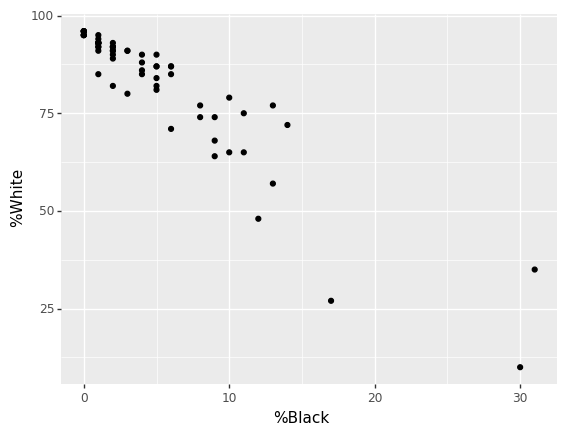

<ggplot: (7017855009)>

In [47]:
ggplot(df3, aes(x= '%Black', y='%White')) + geom_point()

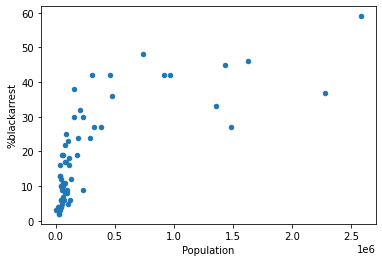

In [48]:
df3.plot(kind='scatter', x='Population', y='%blackarrest')

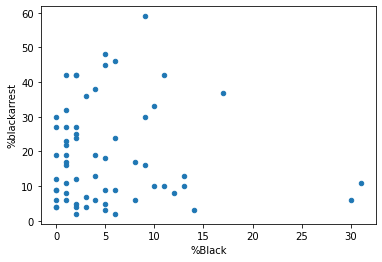

In [49]:
df3.plot(kind='scatter', x='%Black', y='%blackarrest')

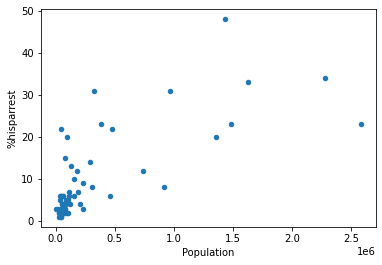

In [50]:
df3.plot(kind='scatter', x='Population', y='%hisparrest')

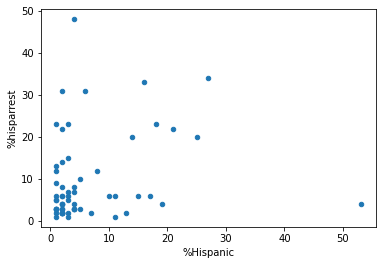

In [51]:
df3.plot(kind='scatter', x='%Hispanic', y='%hisparrest')

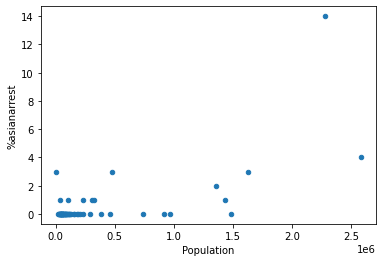

In [52]:
df3.plot(kind='scatter', x='Population', y='%asianarrest')

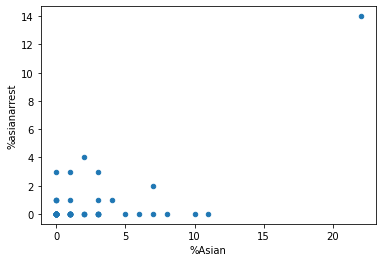

In [53]:
df3.plot(kind='scatter', x='%Asian', y='%asianarrest')

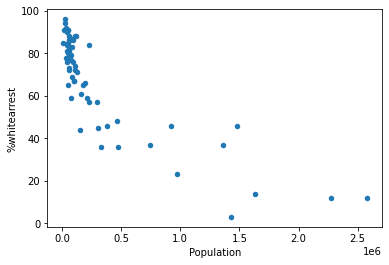

In [54]:
df3.plot(kind='scatter', x='Population', y='%whitearrest')

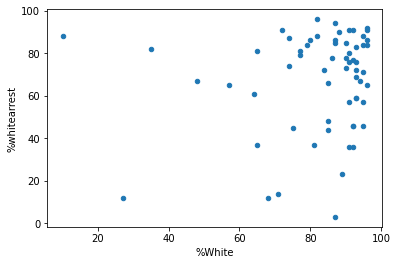

In [55]:
df3.plot(kind='scatter', x='%White', y='%whitearrest')

# Repeate for felony data

In [110]:
# List of sheet names
xl = pd.ExcelFile('all.xls')
sheetnames = xl.sheet_names  

counties = sheetnames[4:66]
column_names = ["Unnamed: 2","Total Arrests","White","Black","Hispanic","Asian","Other-Unknown"]
felony_df = pd.DataFrame(columns = column_names)
# run a loop to extract data from each sheet
data2 = []
for c in counties:
    sheetname = c
    countydata = pd.read_excel('all.xls', sheet_name = sheetname, skiprows = 15,nrows =2, usecols = "C,E:J")
    county = [[]] * 2
    county[0].append(sheetname)
    countydata['County'] = county
    data2.append(countydata)


In [69]:
felony_df = felony_df.append(data2, True)
felony_df.columns = ["category","Total Arrests","White","Black","Hispanic","Asian","Other-Unknown","County"]
felony_df.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County
0,Total Arrests,7132,3242,3035,630,75,150,[Albany]
1,Felony Total,2555,928,1302,254,19,52,[Albany]
2,Total Arrests,830,755,55,12,3,5,[Allegany]
3,Felony Total,257,234,17,5,1,0,[Allegany]
4,Total Arrests,47413,1781,21437,23196,618,381,[Bronx]


In [70]:
# Extract felony data
felony_df = felony_df.loc[felony_df.category == 'Felony Total',:]

In [71]:
felony_df.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County
1,Felony Total,2555,928,1302,254,19,52,[Albany]
3,Felony Total,257,234,17,5,1,0,[Allegany]
5,Felony Total,15731,506,7230,7698,194,103,[Bronx]
7,Felony Total,1428,842,467,96,8,15,[Broome]
9,Felony Total,563,417,74,8,3,61,[Cattaraugus]


In [72]:

felony_df.reset_index(drop=True,inplace=True)

# add population data
felony_df2 = pd.concat([felony_df,population_ce], axis=1)
felony_df2.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population
0,Felony Total,2555,928,1302,254,19,52,[Albany],"306,585"
1,Felony Total,257,234,17,5,1,0,[Allegany],"46,332"
2,Felony Total,15731,506,7230,7698,194,103,[Bronx],"1,432,087"
3,Felony Total,1428,842,467,96,8,15,[Broome],"191,925"
4,Felony Total,563,417,74,8,3,61,[Cattaraugus],"76,726"


In [73]:
# add demographic data
felony_df2 = pd.concat([felony_df2,upchunk], axis=1)

In [75]:
felony_df2.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population,Area,%White,%Black,%Asian,%Hispanic
0,Felony Total,2555,928,1302,254,19,52,[Albany],"306,585",Albany,0.759859,0.119643,0.047665,0.049036
1,Felony Total,257,234,17,5,1,0,[Allegany],"46,332",Columbia,0.882338,0.042649,0.015817,0.038893
2,Felony Total,15731,506,7230,7698,194,103,[Bronx],"1,432,087",Greene,0.870706,0.052945,0.007761,0.049146
3,Felony Total,1428,842,467,96,8,15,[Broome],"191,925",Rensselaer,0.856525,0.060165,0.021759,0.038136
4,Felony Total,563,417,74,8,3,61,[Cattaraugus],"76,726",Saratoga,0.927325,0.013902,0.017668,0.024038


In [76]:
# Calculate the percentage of arrest for each race
felony_df2['%blackarrest'] = felony_df2['Black']/felony_df2['Total Arrests']*100
felony_df2['%whitearrest'] = felony_df2['White']/felony_df2['Total Arrests']*100
felony_df2['%hisparrest'] = felony_df2['Hispanic']/felony_df2['Total Arrests']*100
felony_df2['%asianarrest'] = felony_df2['Asian']/ felony_df2['Total Arrests']*100

felony_df2['%White'] = felony_df2['%White']*100
felony_df2['%Black'] = felony_df2['%Black']*100
felony_df2['%Hispanic'] = felony_df2['%Hispanic']*100
felony_df2['%Asian'] = felony_df2['%Asian']*100

In [80]:

# remove the commas
felony_df2 = felony_df2.replace(',','', regex=True)
# convert to numbers
felony_df2['%White'] = felony_df2['%White'].astype('int64')
felony_df2['%Black'] = felony_df2['%Black'].astype('int64')
felony_df2['%Hispanic'] = felony_df2['%Hispanic'].astype('int64')
felony_df2['%Asian'] = felony_df2['%Asian'].astype('int64')

felony_df2['%blackarrest'] = felony_df2['%blackarrest'].astype('int64')
felony_df2['%hisparrest'] = felony_df2['%hisparrest'].astype('int64')
felony_df2['%asianarrest'] = felony_df2['%asianarrest'].astype('int64')
# Can't convert object to int directly. need to convert to float first
felony_df2['Population'] = felony_df2['Population'].astype(float)
felony_df2['Population'] = felony_df2['Population'].astype('int64')

In [122]:

data3 = []
for c in counties:
    if (c == 'Bronx'or c=='Kings'or c == 'NewYork'or c == 'Queens'or c == 'Richmond'):
        data3.append('NY city')
    else:
        data3.append('others')


In [123]:
counties2 = pd.DataFrame(counties)

In [124]:
counties2['city'] = data3
counties2.head()

,0,city
0,Albany,others
1,Allegany,others
2,Bronx,NY city
3,Broome,others
4,Cattaraugus,others


In [125]:
felony_df2['city'] = data3

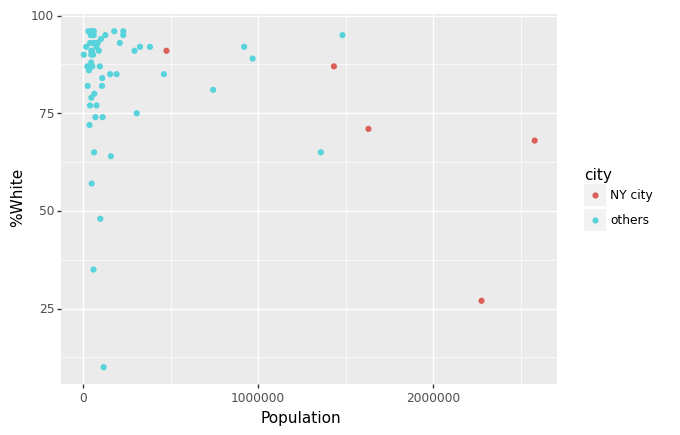

<ggplot: (7019982701)>

In [128]:
ggplot(felony_df2, aes(x= 'Population', y='%White',color = 'city')) + geom_point()

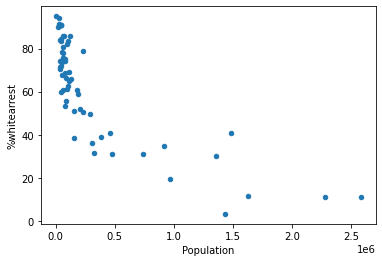

In [81]:
felony_df2.plot(kind='scatter', x='Population', y='%whitearrest')

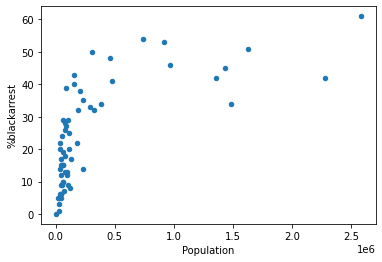

In [82]:
felony_df2.plot(kind='scatter', x='Population', y='%blackarrest')

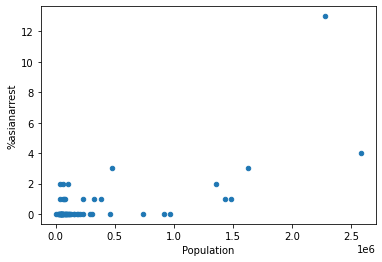

In [84]:
felony_df2.plot(kind='scatter', x='Population', y='%asianarrest')

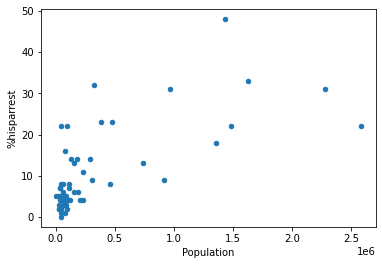

In [85]:
felony_df2.plot(kind='scatter', x='Population', y='%hisparrest')

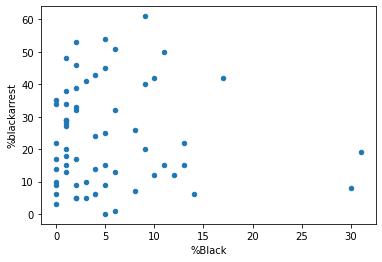

In [89]:
felony_df2.plot(kind='scatter', x='%Black', y='%blackarrest')

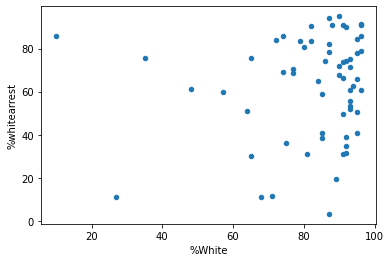

In [86]:
felony_df2.plot(kind='scatter', x='%White', y='%whitearrest')

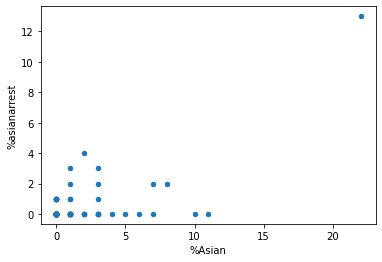

In [87]:
felony_df2.plot(kind='scatter', x='%Asian', y='%asianarrest')

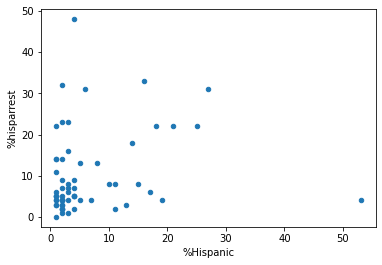

In [88]:
felony_df2.plot(kind='scatter', x='%Hispanic', y='%hisparrest')